# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Ingest Data  

In [155]:
df = pd.read_excel('World military power.xlsx', header=[0,1])
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                    30.0  ...      Afghanistan   
1                                     0.0  ...          Albania   
2                                    59.0  ...          Algeria   
3                                    30.0  ...           Angola   
4                                     9.0  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                      28748.0   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                            0.0   
1                  Albania                          362.0   
2                  Algeria                          998.0   
3                   Angola                         1600.0   
4                Argentina                         4989.0   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                        1200.0           Afghanistan   
1                 Albania                          41.0               Albania   
2                 Algeria                           0.0               Algeria   
3                  Angola                        1300.0                Angola   
4               Argentina                       11000.0             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


# EDA

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

## Implement basic steps to see how is your data looks like

In [157]:
df.shape

(138, 60)

In [158]:
df.isna().sum().any()

True

In [159]:
df.duplicated().sum()

0

## Convert multi index columns to one level

In [160]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [162]:
df.columns = ['_'.join(tuple(map(str, t))) for t in df.columns.values]

In [163]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

## Detect and drop duplicated columns

In [164]:
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

value_cols

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil

In [165]:
value_df = df[value_cols].copy()
value_df.insert(0, "country",df["2020 ranking_Military Strength"])
value_df.insert(1, "Military Strength Power Index", df["2020 ranking_Military Strength Power Index"])
value_df.head()

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


## Check for missing values 

In [166]:
df.isnull().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Geography_Total Coastline Coverage                           29
Navy Strength_Submarine Fleet Strength                       23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Frigate Fleet Strength                         23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Destroyer Fleet Strength                       23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Aircraft Carrier Fleet Strength                23
Navy Strength_Navy Fleet Strengths                           14
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage                               9
Geography_Total Border Coverage value                         9
Airforce Strength_Attack Helicopter Fleet Strength            0
Manpower_Available Manpower             

<Figure size 288x432 with 0 Axes>

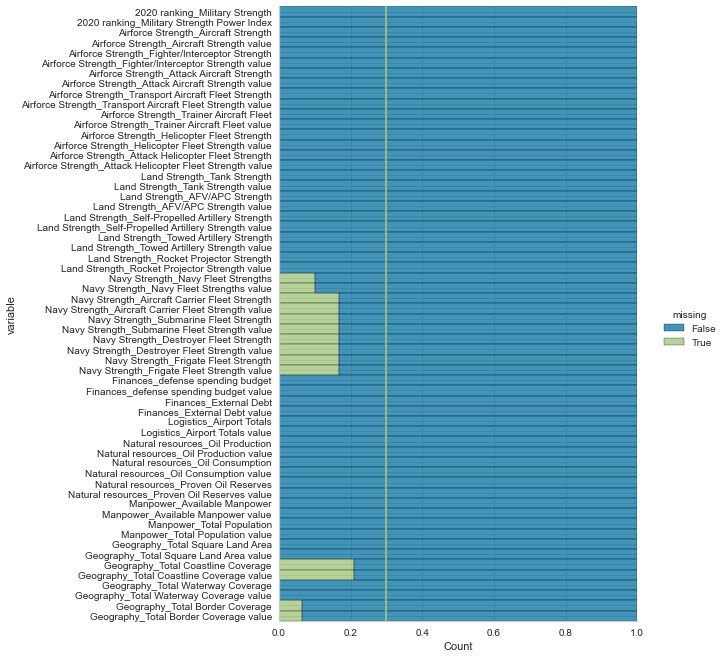

In [167]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

In [168]:
df.isnull().melt(value_name="missing")

,variable,missing
0,2020 ranking_Military Strength,False
1,2020 ranking_Military Strength,False
2,2020 ranking_Military Strength,False
3,2020 ranking_Military Strength,False
4,2020 ranking_Military Strength,False
...,...,...
8275,Geography_Total Border Coverage value,False
8276,Geography_Total Border Coverage value,False
8277,Geography_Total Border Coverage value,False
8278,Geography_Total Border Coverage value,False


In [169]:
with pd.option_context('display.max_columns', None):
    display(df[df["Geography_Total Coastline Coverage"].isna()])

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Logistics_Airport Totals value,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
5,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,Armenia,13.0,Armenia,37.0,Armenia,20.0,Armenia,110.0,Armenia,748.0,Armenia,38.0,Armenia,150.0,Armenia,68.0,Armenia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000",Armenia,"10,41,00,00,000",Armenia,11.0,Armenia,0.0,Armenia,47500.0,Armenia,0.0,Armenia,"16,96,085",Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
7,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,Austria,32.0,Austria,62.0,Austria,0.0,Austria,56.0,Austria,467.0,Austria,33.0,Austria,0.0,Austria,0.0,Austria,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,"3,38,00,00,000",Austria,"6,30,80,00,00,000",Austria,52.0,Austria,14260.0,Austria,"2,15,000",Austria,"4,30,00,000",Austria,"40,17,691",Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
11,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,Belarus,28.0,Belarus,63.0,Belarus,21.0,Belarus,532.0,Belarus,1560.0,Belarus,482.0,Belarus,228.0,Belarus,238.0,Belarus,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belarus,"62,37,02,800",Belarus,"39,92,00,00,000",Belarus,65.0,Belarus,32000.0,Belarus,"1,90,000",Belarus,"19,80,00,000",Belarus,"49,82,905",Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
13,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,27.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bhutan,"2,51,20,000",Bhutan,"2,67,10,00,000",Bhutan,2.0,Bhutan,0.0,Bhutan,2000.0,Bhutan,0.0,Bhutan,"1,76,808",Bhutan,"7,66,397",Bhutan,

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [171]:
value_df.loc[value_df["Geography_Total Coastline Coverage value"].isnull(), ['country',
                                                                             'Navy Strength_Navy Fleet Strengths value',
                                                                             'Navy Strength_Aircraft Carrier Fleet Strength value',
                                                                             'Navy Strength_Submarine Fleet Strength value',
                                                                             'Navy Strength_Destroyer Fleet Strength value',
                                                                             'Navy Strength_Frigate Fleet Strength value',
                                                                             'Geography_Total Waterway Coverage value']]

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Geography_Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0.0
7,Austria,0.0,NaN,NaN,NaN,NaN,0.0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,0.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800.0
24,Chad,NaN,NaN,NaN,NaN,NaN,0.0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664.0


In [172]:
value_df.loc[
    
    value_df["Geography_Total Coastline Coverage value"].isnull(),
    
    ['Navy Strength_Navy Fleet Strengths value',
     'Navy Strength_Aircraft Carrier Fleet Strength value',
     'Navy Strength_Submarine Fleet Strength value',
     'Navy Strength_Destroyer Fleet Strength value',
     'Navy Strength_Frigate Fleet Strength value']
    
    ] = 0

<Figure size 288x432 with 0 Axes>

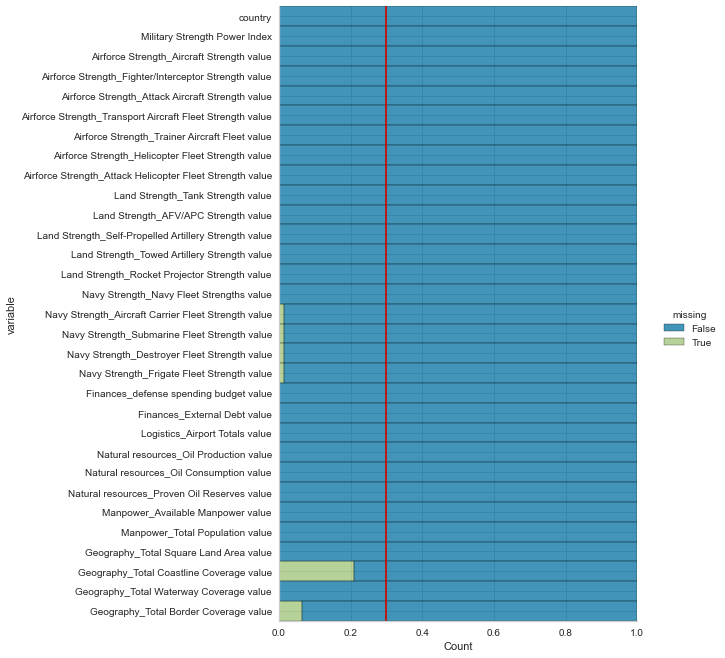

In [173]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [174]:
value_df.loc[value_df['Navy Strength_Aircraft Carrier Fleet Strength value'].isnull()|
             value_df['Navy Strength_Submarine Fleet Strength value'].isnull()|
             value_df['Navy Strength_Destroyer Fleet Strength value'].isnull()|
             value_df['Navy Strength_Frigate Fleet Strength value'].isnull()] 

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.1509,1649.0,414.0,71.0,41.0,298.0,803.0,112.0,2614.0,...,111.0,0.0,"28,00,000",0.0,"2,57,09,049","5,14,18,097",99720.0,2413.0,1600.0,237.0
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,...,53.0,46070.0,"1,42,000","59,40,00,000","1,59,12,566","3,00,23,709","4,47,400",420.0,1100.0,6893.0


In [176]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
132,0.0,NaN,NaN,NaN,NaN


In [177]:
value_df.loc[value_df["country"] == "South Korea",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
110,234.0,NaN,NaN,NaN,NaN


In [178]:
value_df.loc[((value_df['Navy Strength_Navy Fleet Strengths value'] > 200) & 
             (value_df['Navy Strength_Navy Fleet Strengths value'] < 250)),
            ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
2,Algeria,201.0,0.0,6.0,0.0,5.0
39,Finland,246.0,0.0,0.0,0.0,0.0
55,Italy,249.0,2.0,8.0,4.0,12.0
110,South Korea,234.0,NaN,NaN,NaN,NaN


In [179]:
value_df.loc[value_df["country"] == "France",
             ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

,country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
40,France,180.0,4.0,9.0,11.0,11.0


In [180]:
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Aircraft Carrier Fleet Strength value'] = 2
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Submarine Fleet Strength value'] = 19
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Destroyer Fleet Strength value'] = 12
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Frigate Fleet Strength value'] = 12

<Figure size 288x432 with 0 Axes>

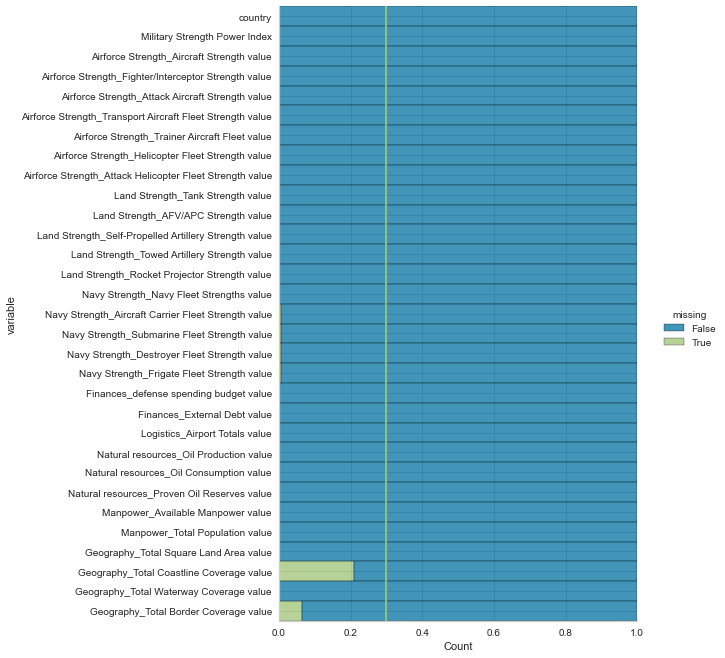

In [181]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

In [182]:
value_df.loc[value_df['Geography_Total Coastline Coverage value'].isnull()]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,...,52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,...,855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,...,74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,...,23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,...,39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,...,59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,...,128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0


In [183]:
value_df.loc[value_df['Geography_Total Coastline Coverage value'].isnull(), 
                      'Geography_Total Coastline Coverage value']  = 0 

In [184]:
value_df.loc[value_df['Geography_Total Border Coverage value'].isnull()]

,country,Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,...,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
9,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,...,4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN
57,Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,...,175.0,3841.0,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751.0,1770.0,NaN
69,Madagascar,3.0869,6.0,0.0,0.0,0.0,0.0,6.0,0.0,12.0,...,83.0,0.0,18500.0,0.0,"1,01,45,026","2,56,83,610","5,87,040",4828.0,600.0,NaN
83,New Zealand,1.3684,48.0,0.0,0.0,7.0,13.0,22.0,0.0,0.0,...,123.0,31480.0,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.0,0.0,NaN
95,Philippines,0.7852,171.0,0.0,19.0,23.0,24.0,97.0,0.0,7.0,...,247.0,15000.0,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289.0,3219.0,NaN
105,Singapore,0.7966,235.0,100.0,0.0,9.0,36.0,77.0,17.0,180.0,...,9.0,0.0,"13,40,000",0.0,"40,17,314","59,95,991",697.0,193.0,10.0,NaN
113,Sri Lanka,1.4661,77.0,0.0,0.0,15.0,6.0,54.0,9.0,202.0,...,19.0,0.0,90000.0,0.0,"1,09,27,071","2,25,76,592",65610.0,1340.0,160.0,NaN
119,Taiwan,0.4008,744.0,289.0,0.0,19.0,207.0,210.0,91.0,1180.0,...,37.0,196.0,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980.0,1566.0,3720.0,NaN


In [186]:
value_df.loc[value_df['Geography_Total Border Coverage value'].isnull(), 
                      'Geography_Total Border Coverage value' ] = 0

<Figure size 288x432 with 0 Axes>

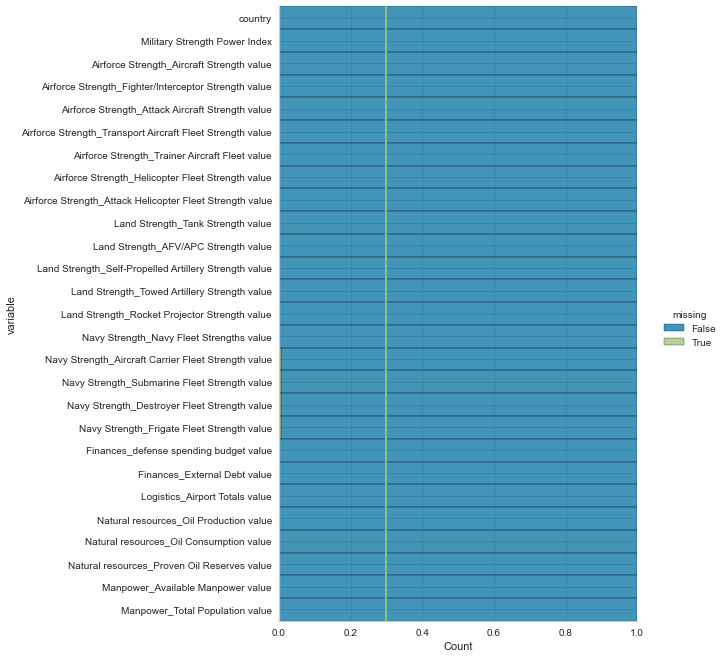

In [220]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

In [222]:
value_df.reset_index(drop=True,inplace=True)

## Fix the dtypes

In [223]:
value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [224]:
value_df.select_dtypes("object")

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [226]:
value_df.select_dtypes("object")["Natural resources_Oil Production value"].str.replace(",","")

KeyError: 'Natural resources_Oil Production value'

In [227]:
columns = value_df.select_dtypes("object").columns
columns

Index(['country'], dtype='object')

In [228]:
for col in columns[1:]:
    value_df[col]  = value_df[col].astype("str")
    value_df[col]  = value_df.select_dtypes("object")[col].str.replace(',','')
    value_df[col]  = value_df[col].astype("float")

In [229]:
 value_df.select_dtypes("object")

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [230]:
value_df.columns

Index(['country', 'Military Strength Power Index',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength value',
       'Land Strength_AFV/APC Strength value',
       'Land Strength_Self-Propelled Artillery Strength value',
       'Land Strength_Towed Artillery Strength value',
       'Land Strength_Rocket Projector Strength value',
       'Navy Strength_Navy Fleet Strengths value',
       'Navy Strength_Aircraft Carrier Fleet Strength value',
       'Navy Strength_Submarine Fleet Strength value',
       'Navy Strength_Destroyer Fleet Strength value',
       'Navy Strength_Frigate Flee

In [231]:
value_df.drop(['Geography_Total Square Land Area value',
               'Geography_Total Coastline Coverage value',
               'Geography_Total Waterway Coverage value',
               'Geography_Total Border Coverage value'],axis=1,inplace=True)

KeyError: "['Geography_Total Square Land Area value'\n 'Geography_Total Coastline Coverage value'\n 'Geography_Total Waterway Coverage value'\n 'Geography_Total Border Coverage value'] not found in axis"

## Visualy inspect the some features

In [197]:
! pip install plotly 

In [198]:
import plotly.express as px

In [199]:
fig = px.bar(value_df,x= "country" , y = value_df["Airforce Strength_Aircraft Strength value"])
fig.show()

In [200]:
fig = px.box(value_df, x = value_df["Airforce Strength_Aircraft Strength value"],
             hover_name=value_df["country"])
fig.show()

In [201]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=value_df["Finances_External Debt value"],
              hovertext=value_df["country"],
              name = "Finances_External Debt value")
             )
fig.add_trace(go.Box(x=value_df["Finances_defense spending budget value"],
                     hovertext=value_df["country"],
                    name = "Finances_defense spending budget value")
             )

fig.show()

## Decriptive statistics

In [202]:
value_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Airforce Strength_Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Airforce Strength_Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Airforce Strength_Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Airforce Strength_Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Airforce Strength_Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Airforce Strength_Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Airforce Strength_Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Land Strength_Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
Land Strength_AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


In [203]:
fig = px.imshow(value_df.corr())
fig.show()

# Data Preprocessing

In [215]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [216]:
X = value_df.drop(["country"], axis=1)

In [217]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [212]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [213]:
from pyclustertend import hopkins

In [232]:
hopkins(X, X.shape[0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Clustering with K-means

In [219]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
ssd

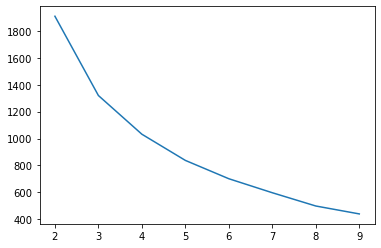

In [86]:
sns.lineplot(x=K, y = ssd,markers="x")

plt.show()

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [91]:
! pip install -U yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [92]:
from yellowbrick.cluster import KElbowVisualizer

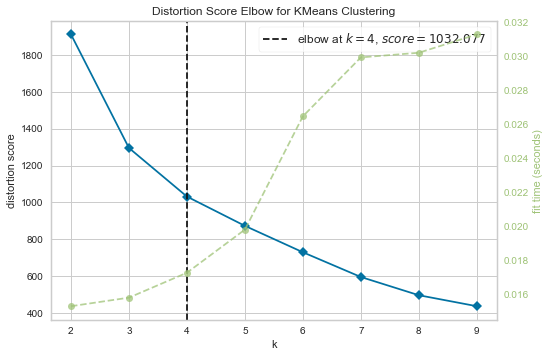

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

### Model Building and label visualisation

In [94]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [95]:
model.inertia_

1033.8390912573811

In [96]:
model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 3, 0, 0, 0])

In [97]:
value_df["cluster"] = model.labels_

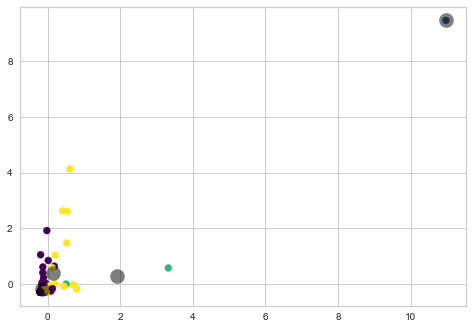

In [98]:
centroids = model.cluster_centers_

plt.scatter(X[:,18], X[:,19], c = value_df.cluster, s = 50, cmap = "viridis")
plt.scatter(centroids[:,18], centroids[:,19], c = "black", s = 200, alpha=0.5);

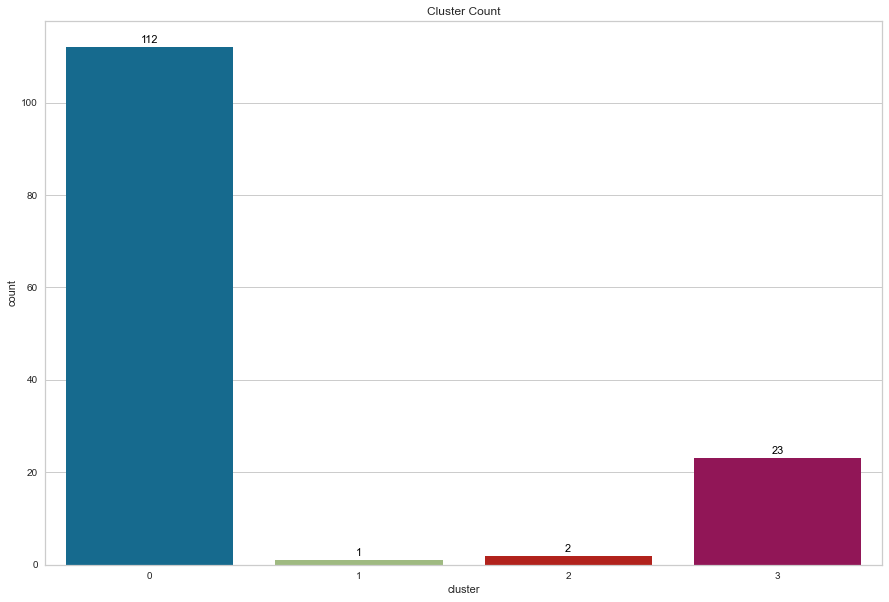

In [99]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [100]:
value_df[value_df["cluster"] == 0]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,0.0,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,...,0.0,9.750000e+08,1.690000e+10,53.0,46070.0,142000.0,5.940000e+08,15912566.0,30023709.0,0
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,4.0,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,0.0,1.400000e+09,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,0.0,4.000000e+07,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,0


In [101]:
value_df[value_df["cluster"] == 1]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,0.0,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,1


In [102]:
value_df[value_df["cluster"] == 2]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,52.0,2.370000e+11,1.598000e+12,507.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,2
101,Russia,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,...,10.0,4.800000e+10,5.396000e+11,1218.0,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,2


In [103]:
value_df[value_df["cluster"] == 3]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,3
17,Brazil,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,...,7.0,2.780000e+10,5.474000e+11,4093.0,2622000.0,3020000.0,1.300000e+10,107764996.0,2.088469e+08,3
22,Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,...,12.0,2.250000e+10,1.608000e+12,1467.0,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,3
35,Egypt,0.1872,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,...,7.0,1.120000e+10,7.747000e+10,83.0,589400.0,832000.0,4.400000e+09,42946553.0,9.941332e+07,3
40,France,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,...,11.0,4.150000e+10,5.360000e+12,464.0,15170.0,1600000.0,7.235000e+07,30111868.0,6.736436e+07,3
43,Germany,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,...,9.0,5.000000e+10,5.326000e+12,539.0,43410.0,2500000.0,1.454000e+08,37010559.0,8.045774e+07,3
45,Greece,0.5311,566.0,187.0,0.0,15.0,143.0,231.0,29.0,1355.0,...,13.0,4.844000e+09,5.066000e+11,77.0,2753.0,350000.0,1.000000e+07,4993347.0,1.076152e+07,3
49,India,0.0953,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,...,13.0,6.100000e+10,5.016000e+11,346.0,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,3
50,Indonesia,0.2544,462.0,41.0,39.0,54.0,109.0,177.0,16.0,313.0,...,7.0,7.600000e+09,3.444000e+11,673.0,801700.0,1630000.0,3.230000e+09,130868127.0,2.627874e+08,3
51,Iran,0.2191,509.0,155.0,23.0,62.0,94.0,100.0,12.0,2056.0,...,7.0,1.960000e+10,7.995000e+09,319.0,4469000.0,2000000.0,1.584000e+11,47324105.0,8.302474e+07,3


### Evaluate 

In [104]:
from sklearn.metrics import silhouette_score

In [105]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster)}')

Silhouette Score(n=4): 0.5253064588056993


In [133]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8193950812093086
For n_clusters=4, the silhouette score is 0.4956608189413284
For n_clusters=5, the silhouette score is 0.5177311271740322
For n_clusters=6, the silhouette score is 0.48669858072616184
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.47714406079950733
For n_clusters=9, the silhouette score is 0.21512938360600717


In [107]:
den = pd.DataFrame(X,columns=value_df.drop(["country","cluster"],axis=1).columns)
den["cluster"] = value_df["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster,0,1,2,3
Military Strength Power Index,0.209001,-1.061327,-1.055263,-0.879836
Aircraft Strength value,-0.220108,10.489144,2.686763,0.382151
Fighter/Interceptor Strength value,-0.261190,8.729991,4.230860,0.524417
Attack Aircraft Strength value,-0.209619,7.317921,5.635064,0.212579
Transport Aircraft Fleet Strength value,-0.210509,9.943640,3.193295,0.315076
Trainer Aircraft Fleet value,-0.218901,10.670489,1.344839,0.485076
Helicopter Fleet Strength value,-0.203281,10.831533,2.049863,0.340707
Attack Helicopter Fleet Strength value,-0.200884,9.707636,3.922510,0.215061
Tank Strength value,-0.278982,3.736804,5.018954,0.759621
AFV/APC Strength value,-0.290573,6.820244,5.107360,0.674316


## Hierarchical Clustering

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [134]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

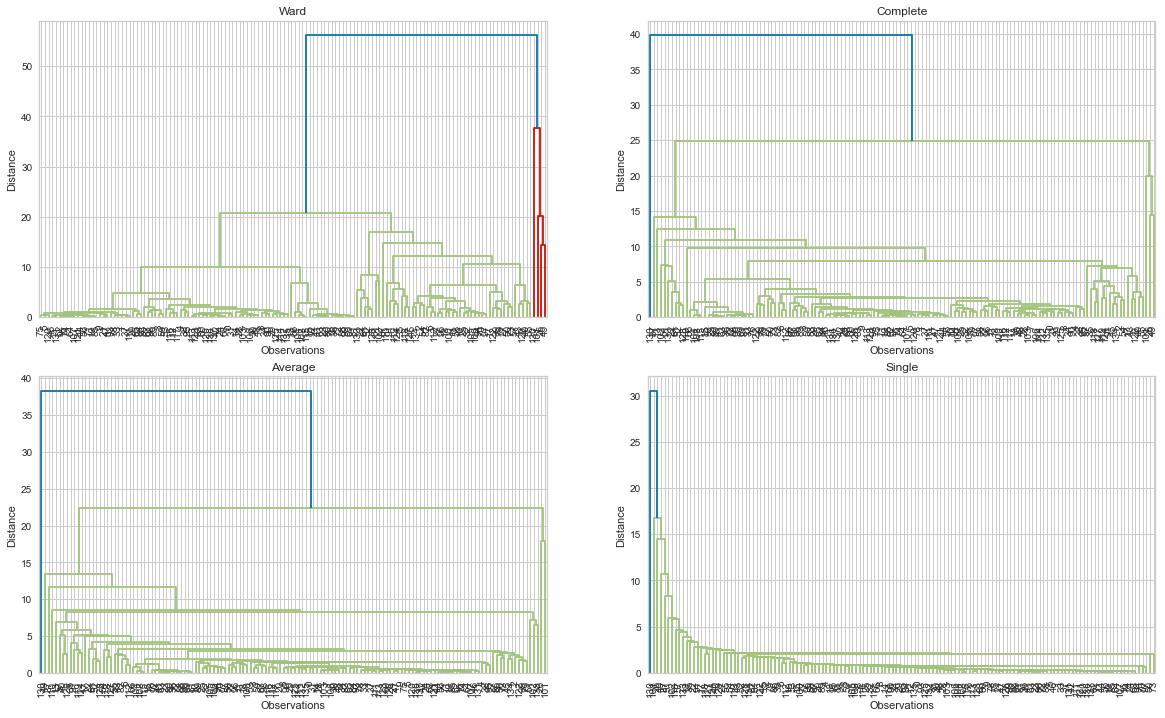

In [135]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [136]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [140]:
value_df["cluster_1"] = model1.labels_

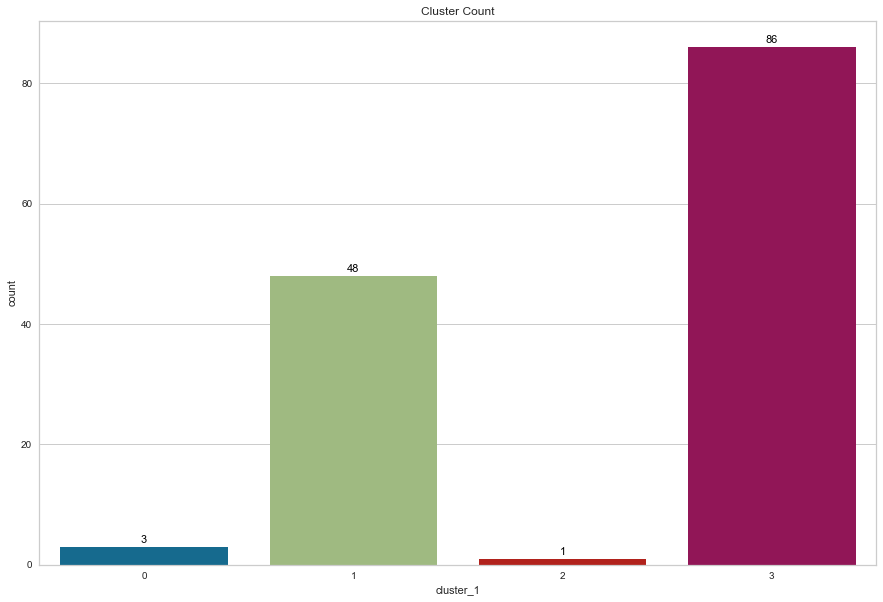

In [141]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [126]:
value_df[value_df["cluster_1"] == 0]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,2.370000e+11,1.598000e+12,507.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,2,0
49,India,0.0953,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,...,6.100000e+10,5.016000e+11,346.0,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,3,0
101,Russia,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,...,4.800000e+10,5.396000e+11,1218.0,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,2,0


In [127]:
value_df[value_df["cluster_1"] == 1]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,3,1
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,2.630000e+10,1.714000e+12,480.0,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,0,1
10,Bangladesh,0.7066,177.0,44.0,0.0,11.0,57.0,67.0,0.0,276.0,...,3.800000e+09,5.026000e+10,18.0,3666.0,112000.0,2.800000e+07,78913289.0,159453001.0,0,1
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,6.237028e+08,3.992000e+10,65.0,32000.0,190000.0,1.980000e+08,4982905.0,9527543.0,0,1
17,Brazil,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,...,2.780000e+10,5.474000e+11,4093.0,2622000.0,3020000.0,1.300000e+10,107764996.0,208846892.0,3,1
18,Bulgaria,0.8916,63.0,13.0,4.0,5.0,20.0,25.0,2.0,710.0,...,1.079000e+09,4.206000e+10,68.0,1000.0,115000.0,1.500000e+07,3278916.0,7057504.0,0,1
22,Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,...,2.250000e+10,1.608000e+12,1467.0,3977000.0,2500000.0,1.697000e+11,16110865.0,35881659.0,3,1
25,Chile,0.7668,282.0,44.0,0.0,30.0,93.0,92.0,0.0,300.0,...,4.250000e+09,1.834000e+11,481.0,3244.0,325000.0,1.500000e+08,8657902.0,17925262.0,0,1
27,Colombia,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,...,1.060000e+10,1.246000e+11,836.0,853600.0,300000.0,2.002000e+09,24084498.0,48168996.0,0,1
32,Denmark,0.7878,113.0,33.0,0.0,4.0,38.0,35.0,0.0,57.0,...,4.760000e+09,4.848000e+11,80.0,137100.0,162000.0,4.906000e+08,2590457.0,5809502.0,0,1


In [143]:
value_df[value_df["cluster_1"] == 2]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1,cluster_0
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,1,2,2


In [142]:
value_df[value_df["cluster_1"] == 3]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1,cluster_0
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0,3,3
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0,3,3
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0,3,3
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0,3,3
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Uruguay,1.8909,50.0,0.0,7.0,9.0,16.0,13.0,0.0,78.0,...,2.837000e+10,133.0,0.0,55600.0,0.000000e+00,1549878.0,3369299.0,0,3,3
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,...,1.690000e+10,53.0,46070.0,142000.0,5.940000e+08,15912566.0,30023709.0,0,3,3
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,0,3,3
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,0,3,3


### Evaluate 

In [146]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster_1)}')

Silhouette Score(n=4): 0.3546913282067596


In [147]:
from sklearn.cluster import MeanShift

In [148]:
model2 = MeanShift(bandwidth=.1).fit(X)

In [149]:
model2.fit_predict(X)

array([ 59,  22, 109,  81,  94,  26, 118,  71,  73,  44,  91,  84,  67,
         1,  70,   4,  29, 127,  75,  40,  30,  36, 113,   8,  50,  90,
       134, 100,  68,  64, 103,  66,  88,  17,  69, 128,  11,  18,  77,
        78, 130,   7,  48, 124,  31, 104,  45,  27,  83, 133, 121, 123,
        87,  38, 119, 125,  33, 132,  65,  74,  53,  52,  39,   6,  35,
        19,   2,  57,  54,  12,  93,  41,  13,  99,  25,  32,  14,  80,
        21, 102,   9,  15, 101,  58,  23,  34,  95, 112,  10, 106,  62,
       122,   5,  24,  97,  89, 116,  76,  47,  16,  98, 135, 120,  72,
         3,  86,  79,  37,   0, 108, 131,  20, 117,  55,  61,   0, 105,
       107,  82, 111,  43,  28, 114,  56, 126,  60,  51, 110,  92, 129,
       136,  42,  85,  96, 115,  63,  49,  46], dtype=int64)

In [150]:
model2.labels_

array([ 59,  22, 109,  81,  94,  26, 118,  71,  73,  44,  91,  84,  67,
         1,  70,   4,  29, 127,  75,  40,  30,  36, 113,   8,  50,  90,
       134, 100,  68,  64, 103,  66,  88,  17,  69, 128,  11,  18,  77,
        78, 130,   7,  48, 124,  31, 104,  45,  27,  83, 133, 121, 123,
        87,  38, 119, 125,  33, 132,  65,  74,  53,  52,  39,   6,  35,
        19,   2,  57,  54,  12,  93,  41,  13,  99,  25,  32,  14,  80,
        21, 102,   9,  15, 101,  58,  23,  34,  95, 112,  10, 106,  62,
       122,   5,  24,  97,  89, 116,  76,  47,  16,  98, 135, 120,  72,
         3,  86,  79,  37,   0, 108, 131,  20, 117,  55,  61,   0, 105,
       107,  82, 111,  43,  28, 114,  56, 126,  60,  51, 110,  92, 129,
       136,  42,  85,  96, 115,  63,  49,  46], dtype=int64)

In [151]:
value_df["cluster_2"] = model2.labels_

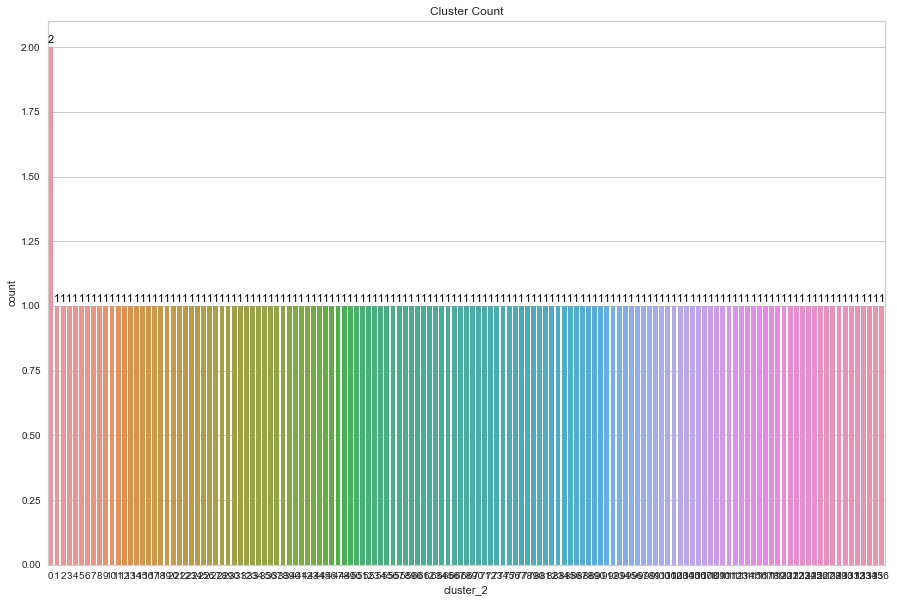

In [152]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster_2)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [153]:
value_df[value_df["cluster_2"] == 0]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1,cluster_0,cluster_2
108,Somalia,4.6404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,61.0,0.0,6200.0,0.0,2702167.0,11259029.0,0,3,3,0
115,Suriname,4.6042,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,55.0,17000.0,15100.0,83980000.0,132740.0,597927.0,0,3,3,0


In [154]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster_2)}')

Silhouette Score(n=4): 0.010516752511026097
